# Object Oriented Programming in Python

* Why Object Oriented Programming
* From **procedural programming** to **object oriented Programming**
* Defining new classes
* Properties
* Inheritance
* Composition
* Class and static methods
* How does OOP work in python
* Presentation of a few design patterns
* Definitions
* Conclusions


Very different from Procedural Programming which you are used to.

==> Change of paradigm 

## Why Object Oriented Programming

* Mandatory for most GUI programming, hence needed for this afternoon's introduction to GUI programming
* Object Oriented Programming is mandatory in some languages like Java, but not in Python

### Separate the Design from Implementation
* Create new classes and define instances of them doing the work
* Design can be made by architects (using tools like UML, … )
* Implementation can be outsourced to another team

### Benefits
* Write less code and re-use more. 
* Rely on external libraries
* Get features implemented, both faster and more reliably
* Better separation of the different pieces of work to be done

## Back on  Procedural Programming

* Divides your program into reusable 'chunks' called procedures, functions or subroutines
* Make the logic of the program separated from low level implementation (easier to understand)

### Data separation:
* Function take arguments as input and return a value (or modify input)
* Input data-structure not always simple …

### Limits of Procedural Programming
* Often functions ends up in taking dozen of parameters!
* It is tempting to use GLOBAL variables which is a very BAD idea


### Idea of Object Oriented Programming: 
* Merge data and logics in objects
* Avoid global variables

## What is an object:
* An entity that encapsulate data together with functions for manipulating those data. Those function are called **methods** in OOP
* In Python everything is object: strings, dictionaries, integers, functions ... 

This means two strings have certain things in common: they are instances of the same class: **str** !

Reminder: In Python, everything is an object !

So let's consider the complex number **5+8j** as an exemple !

In [1]:
z = 5 + 8j
print(z)
type(z)

(5+8j)


complex

### An object contains data

* In OOP, those data are called *attributes* 
* Attributes can be accessed with **object.attribute** 

In this example, the data stored are the *real* and *imag* part of the complex number

In [2]:
z.real, z.imag

(5.0, 8.0)

In this example, *real* and *imag* are read-only properties but generally, the access is in read/write. 

## An objects contains logic

* The logic is stored in *inner functions* called **methods**. 
* Methods are defined in the class.
* Because methods apply primarly on the *object itself*, the name of the first argument is **self**. 
* Methods can take other arguments as normal functions do
* The *self* argument is provided by default by the object, you don't need to care about 
when calling the method

In our example, the complex number contains a method to calculate the conjugate value:



In [3]:
type(z.conjugate)

builtin_function_or_method

In [4]:
z.conjugate()

(5-8j)

## Object creation

* Object creation is called **instantiation** of the class
* Instantiation is just like calling the class as if it was a function
* One can usually provide arguments when instantiating the class.

In [5]:
z = complex(5,8)
type(z)

complex

In [6]:
s = str(5)
type(s)

str

* The *method* responsible for creating objects is called the **constructor**
* All parameters passed when creating a object are actually given to the constructor
* In Python the constructor is called ``__init__`` and takes also *self* as first argument

## Defining new classes

* The **class** keyword is used to declare the definition of a new class, like *def* for functions
* Provide the **name** for the class followed by **colon** to start the implementation.

In [7]:
class Sample:
    "This is the base class for all my samples"
    pass

* Class can **inherit** the structure and methods from a parent class (or superclass).
* By default any class inherits from *object*.
* The superclass name can be provided in parenthesis:

In [8]:
class Oxide(Sample):
    "The class Oxide inherits properties from the Sample class"
    pass

* **Methods** are declared like sub-functions of the class
* methods always take **self** as **first argument** to refer to the instance itself
* The *self* argument allows to access to the attributes and other methods of the class

* The *constructor* is a method called `__init__` in Python
* The *constructor* always returns the instance itself, no need to specify it.
* Hence it is an error to use *return* in a *constructor*.
* Like all other methods, the *constructor* takes **self** as first argument
* The constructor is responsible for declaring all attributes. Prevents **AttributeError**

In [9]:
class Oxide:
    "Defines simple oxides"
    def __init__(self, metal, nmet, nox):
        "Provide the metal name and the number of them and oxygens"
        self.metal = str(metal)
        self.nmet = int(nmet)
        self.nox = int(nox)
    def formula(self):
        if self.nmet>1:
            formula = "%s%iO%i"%(self.metal, self.nmet, self.nox)
        else:
            formula = "%sO%i"%(self.metal, self.nox)
        return formula

In [10]:
ceria = Oxide("Ce", 1, 2)
ceria.formula()

'CeO2'

## Naming conventions (PEP8)

* Modules should have short, all-lowercase names  and best without underscores
* Almost without exception, class names use the CamelCased convention. 
* Because exceptions are classes, the class naming convention applies.
* Function names should be lowercase, with words separated by underscores 
* Always use *self* for the first argument to instance methods.
* Always use *cls* for the first argument to class methods.
* Use one leading underscore only for non-public methods and instance variables.
* To avoid name clashes with subclasses, use two leading underscores to invoke Python's name mangling rules.
* Constants are usually defined on a module level and written in all capital letters with underscores separating words.

### Other Convention:
Define all object's attributes in the constructor (to avoid **AttributeError**)

## Exercise 1
* Define a class representing a rectangle
* The constructor should take **width** and **height** as parameter
* Add a method to calculate the area, and another for the perimeter


In [11]:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    def area(self):
        return self.width*self.height
    def perimeter(self):
        return 2*(self.width+self.height)

In [12]:
r = Rectangle(4,5)
print(r.area(), r.perimeter())

20 18


## Accessors & Properties

### Accessors are methods to access attributes for which the acces is controled :
* There are 3 kind of accessors: getters, setters and deleters 

``` 
def get_smth(self):
    return self._something
def set_smth(self, smth):
    self._something = smth
def del_smth(self):
    self._something = None
```

* Accessors are useful to expose non-public attributes & allow fine control of attributes (caching, …)


## Properties are accessors that behaves like attributes

* Accessors are not pythonic, we prefer **properties**
* Obtained by *decorating* the getter with `@property` decorator. 
* Offers a nice syntax for the user
* Exposes a clean API (with indirection)
* The *setter* function should have the **same name** as the *getter* and be decorated with `@getter_name.setter`
* The *deleter* function should have the **same name** as the *getter* and should be decorated with `@getter_name.deleter`

In [13]:
class C(object):
    def __init__(self):
        self._x = None

    @property
    def x(self):
        """I'm the 'x' property."""
        return self._x

    @x.setter
    def x(self, value):
        self._x = value

    @x.deleter
    def x(self):
        del self._x

In [14]:
class C:
    def __init__(self):
        self.x = None

While those two implementations are equivalent, the former offers more control while the second is much more concise.

Here is an example of the Oxide class with the formula changed into a *property*.

In [15]:
class Oxide:
    "Defines simple oxides"
    def __init__(self, metal, nmet, nox):
        "Provide the metal name and the number of them and oxygens"
        self.metal = str(metal)
        self.nmet = int(nmet)
        self.nox = int(nox)
    @property
    def formula(self):
        if self.nmet>1:
            formula = "%s%iO%i"%(self.metal, self.nmet, self.nox)
        else:
            formula = "%sO%i"%(self.metal, self.nox)
        return formula

In [16]:
ceria = Oxide("Ce", 1, 2)
ceria.formula

'CeO2'

## Execrise 2
* Make *area* and *perimeter* two properties the Rectangle class from exercise 1.

In [17]:
class Rectangle:
    "Rectangle class"
    def __init__(self, width, height):
        self.width = width
        self.height = height
    @property
    def area(self):
        return self.width*self.height
    @property
    def perimeter(self):
        return 2*(self.width+self.height)

In [18]:
r = Rectangle(4,5)
print(r.area, r.perimeter)
print(r.__doc__)
r.__class__.__dict__

20 18
Rectangle class


mappingproxy({'__dict__': <attribute '__dict__' of 'Rectangle' objects>,
              '__doc__': 'Rectangle class',
              '__init__': <function __main__.Rectangle.__init__(self, width, height)>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Rectangle' objects>,
              'area': <property at 0x7f587c4f9c28>,
              'perimeter': <property at 0x7f587c4f9b88>})

## Special methods of classes:
* `__new__()`: factory of the class. Allocates the memory before calling the contructor
* `__init__()`: constructor of the class. Allways returns the instance
* `__str__()`: string to be printed (deprecated)
* `__repr__()`: string representing the object (replaces `__str__`)
* `__setattr__(“attr”,value)`: add an attribute: obj.attr = value
* `__getattribute__(“attr”)`: get an attribute: obj.attr
* `__delattr__(“attr”)`: delete an attribute 
* `__subclasses__()`: list of its derivative classes

## Special attributes of instances/objects:
* `__class__`: reference to the class itself in the instance
* `__doc__`: the documentation string (of the class)
* `__dict__`: dictionary containing references to all attributes

## Special attributes of classes:
* `__doc__`: the documentation string used by the *help* function 
* `__dict__`: dictionary containing references to all methods, class-attributes, class methods and properties
* `__name__`: string representing the name of the class 
* `__bases__`: the list of superclasses
* `__mro__`: method resolution order: order of superclass when resolving method calls 

## Inheritance
* Define a new class inheriting from all methods and attributes from a superclass
* Some methods of the superclass should be overwritten and new can be appended.
* The whole family with the superclass and all subclasses is named **class hierarchy**

### The framework pattern
* Define most of the logic in the superclass (saves time)
* Create empty method to be overwritten (abstract methods)
* To actually do the work, the concrete classes does:
    * Inherit from superclass
    * overwrite abstract method and implement them to do the work
    * Maximizes the code reuse

Inheritance based development is very popular in C++ hence for Qt GUI-programming.

But it is not always well suited for Python programming 


## Execrise 3
* Define a class *Square* which inherits from the *Rectangle* of example 2.
* The constructor takes only one parameter: the length of one side. 
* Add a setter accessor for defining the area hence the length of the side
* Define the properties accordingly

In [19]:
class Square(Rectangle):
    def __init__(self, side):
        super().__init__(side, side)
    @property
    def area(self):
        return self.width*self.height
    @area.setter
    def area(self, area):
        self.widht = self.length = (area)**0.5

In [20]:
c = Square(5)
c.area
c.area = 16
c.length

4.0

## Extend or restrict ?

According to *pylint*, to fit into one's brain, classes should be limited to:
* 20 methods
* 7 attributes

But inheritance lets you **only** extend classes by adding new methods or attributes

## Compostion is another way ...

For this a class holds control on other objects.

In [21]:
class Car:
    def __init__(self, *args, ** kwargs):
        self.engine = Engine()
        self.wheels = [Wheel() for i in range(4)]
        self.brakes = Brakes()
    def accelerate(self, val):
        self.engine.accelerate(val)
    def brake(self, val):
        self.brakes.brake(val)

Composition requires often lots of wrapping/cabling which can be done:
* explicitely as in this example 
* implicitly using  `__getattr__` but it makes the code far less readable


## class-attributes
Class are a separate namespace where one can define attributes (variables):

In [22]:
class Oxide:
    "Defines simple oxides"
    state = "solid"
    def __init__(self, metal, nmet, nox):
        "Provide the metal name and the number of them and oxygens"
        self.metal = str(metal)
        self.nmet = int(nmet)
        self.nox = int(nox)
    @property
    def formula(self):
        if self.nmet>1:
            formula = "%s%iO%i"%(self.metal, self.nmet, self.nox)
        else:
            formula = "%sO%i"%(self.metal, self.nox)
        return formula

In [23]:
ceria = Oxide("Ce", 1, 2)
print(ceria.formula, ceria.state)

CeO2 solid


In [24]:
water = Oxide("H", 2, 1)
print(water.formula, water.state)

H2O1 solid


In [25]:
water.state = "liquid"
print(water.state)
print(water.__class__.state)
print(ceria.state)

liquid
solid
solid


In those cases, the attribute name `state` is searched in this order into: 
* the instance namespace
* the class namespace
* all the namspaces of superclasses found in the class hierarchy

## Class methods

Those are methods defined in the class but can access only to class-attributes, not to instance attributes !
* Take the `cls` implicit first argument instead of `self` for normal methods.
* Have access to the class namespace via the `cls` parameter
* Require the use of the **@classmethod** decorator


## Static methods
Those are juste basic functions, juste attached to the class namespace.
* In the namespace of the class
* Cannot access any instance/class attribute.
* No implicitly first argument (no `self`, no `cls`)
* Require the use of the **@staticmethod** decorator

In [26]:
class Oxide:
    "Defines simple oxides"
    state = "solid"
    
    @classmethod
    def print_state(cls):
        return "This %s is in %s state"%(cls.__name__.lower(),cls.state)
    
    def __init__(self, metal, nmet, nox):
        "Provide the metal name and the number of them and oxygens"
        self.metal = str(metal)
        self.nmet = int(nmet)
        self.nox = int(nox)
    @property
    def formula(self):
        if self.nmet>1:
            formula = "%s%iO%i"%(self.metal, self.nmet, self.nox)
        else:
            formula = "%sO%i"%(self.metal, self.nox)
        return formula

In [27]:
ceria = Oxide("Ce", 1, 2)
ceria.print_state()

'This oxide is in solid state'

In [28]:
water = Oxide("H", 2, 1)
print(water.print_state())
water.state = "liquid"
print(water.print_state())

This oxide is in solid state
This oxide is in solid state


## Virtual / abstract methods
In Python, all methods can be sub-classed: they are all **virtual**

But tricks exist...

In [29]:
class AbstractSearch:
    def search(self):
        '''Abstract method'''
        raise NotImplementedError("abstract method to be overwritten")

## Final classes do not exist in Python

Final classes are classes one cannot subclass or inherit from. 

But tricks exists, for example 
Here is a trick found in threading.py:

In [30]:
def Semaphore(*arg, **kwarg):
    return _Semaphore(*arg, **kwarg)

## How does this all work in Python ?

* A class is basically a dictionary with all class-attributes and methods, class-methods and static-methods definied in it. 
* Each instance is another dictionary which contains the instance attributes
* They can be accessed using the `__dict__` attribute:

In [31]:
for k,v in ceria.__dict__.items():
    print(k,": ",v)

nmet :  1
metal :  Ce
nox :  2


In [32]:
for k,v in ceria.__class__.__dict__.items():
    print(k,": ",v)

__weakref__ :  <attribute '__weakref__' of 'Oxide' objects>
__doc__ :  Defines simple oxides
print_state :  <classmethod object at 0x7f587c4ace80>
formula :  <property object at 0x7f587c4c8908>
state :  solid
__dict__ :  <attribute '__dict__' of 'Oxide' objects>
__init__ :  <function Oxide.__init__ at 0x7f587c4a8840>
__module__ :  __main__


## Definition (from Grady Booch)

Object–oriented programming is a method of implementation in which programs are organized as cooperative collections of objects, each of which represents an instance of some class, and whose classes are all members of a hierarchy of classes united via inheritance relationships”.

## Now a serious exercise ... Laue diffraction pattern

In this example we will calculate the diffraction image obtained from a limited set of atoms using the Laue formula. 

The 2D crystal is composed on a square of NxN atoms.

This formula calculates the diffraction image arround the Bragg peak (H, K), actually (H-0.5…H+0.5, K-0.5…K+0.5) considering an oversampling factor. This oversampling factor should be at least 2 to have 2 points per peak. 

In [33]:
"""Laue simulation code"""


import numpy


def laue_array_size(ncells, oversampling):
    """Compute the output array size in each dimension

    :param int ncells:
        Number of unit cells in both directions
    :param int oversampling: Oversampling factor
    :rtype: int
    """
    return ncells * oversampling


def laue_image(ncells, h, k, oversampling):
    """

    :param int ncells:
        Number of unit cells in both directions
    :param int h:
        H Miller index of reflection where to sample space
    :param int k:
        K Miller index of reflection where to sample space
    :param int oversampling:
        Oversampling factor
    :return: 2D array
    :rtype: numpy.ndarray
    """
    size = laue_array_size(ncells, oversampling)

    # Prepare cristal structure
    n = numpy.arange(ncells)
    m = numpy.arange(ncells)

    # Prepare sampling positions
    h_sampling_pos = numpy.linspace(h - 0.5, h + 0.5, size, endpoint=True)
    k_sampling_pos = numpy.linspace(k - 0.5, k + 0.5, size, endpoint=True)

    # Do the computation
    h, k, n, m = numpy.meshgrid(h_sampling_pos, k_sampling_pos, n, m, sparse=True)

    # Sum over the unit-cells (last axis of the array) and take the squared modulus
    return numpy.abs(numpy.exp(2j*numpy.pi*(h*n + k*m)).sum(axis=(2,3)))**2



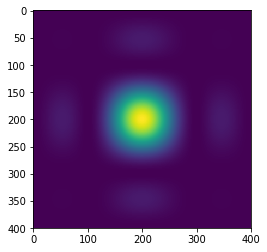

In [34]:
%matplotlib inline
from matplotlib. pyplot import subplots
fig, ax = subplots()
ax.imshow(laue_image(4, 5, 6, 100))

In [35]:
# The problem is this function can take a while to calculate...
%time laue_image(20, 5, 6, 50)

CPU times: user 26.5 s, sys: 1.5 s, total: 28 s
Wall time: 28 s


array([[2.13307989e-27, 2.12113874e-26, 9.41612901e-27, ...,
        1.10804288e-25, 6.20606008e-29, 5.56488988e-24],
       [7.11094882e-26, 1.56070439e-05, 6.21833958e-05, ...,
        6.21833958e-05, 1.56070439e-05, 7.51020542e-27],
       [4.44911580e-28, 6.21833958e-05, 2.47758303e-04, ...,
        2.47758303e-04, 6.21833958e-05, 1.29199918e-26],
       ...,
       [2.99834012e-27, 6.21833958e-05, 2.47758303e-04, ...,
        2.47758303e-04, 6.21833958e-05, 2.92487075e-26],
       [1.66875565e-25, 1.56070439e-05, 6.21833958e-05, ...,
        6.21833958e-05, 1.56070439e-05, 7.37487745e-27],
       [3.81808678e-26, 1.18266213e-25, 4.46032217e-24, ...,
        4.87389428e-26, 8.65717510e-27, 3.95818848e-26]])

The solution is to put this calculation in a thread, 
Please read the documentation of the `threading.Thead` class and try to make a derivative class that performs the *Laue* calculation in a thread. 



In [36]:
import threading
threading.Thread?

One way of using `Thread` is to override the `run` method in a subclass.

The constructor should take all parameters for 

In [41]:
class LaueThread(threading.Thread):
    def __init__(self, ncells, h, k, oversampling):
        self.ncells = ncells
        self.h = h
        self.k = k
        self.oversampling = oversampling
        self.result = None
        super(LaueThread, self).__init__(name="LaueThread", group=None)
    def run(self):
        self.result = laue_image(self.ncells, self.h, self.k, self.oversampling)

In [47]:
t=LaueThread(10,5,5,50)
t.start()
import time
for i in range(100): 
    print(t.result)
    time.sleep(0.1)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]
 [9.18812816e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 4.58688720e-28]
 [1.06149123e-26 1.83660242e-27 5.35105171e-27 ... 6.24838927e-27
  4.51682235e-28 2.91613478e-25]]
[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.5331

[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]
 [9.18812816e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 4.58688720e-28]
 [1.06149123e-26 1.83660242e-27 5.35105171e-27 ... 6.24838927e-27
  4.51682235e-28 2.91613478e-25]]
[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]

[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]
 [9.18812816e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 4.58688720e-28]
 [1.06149123e-26 1.83660242e-27 5.35105171e-27 ... 6.24838927e-27
  4.51682235e-28 2.91613478e-25]]
[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]

[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]
 [9.18812816e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 4.58688720e-28]
 [1.06149123e-26 1.83660242e-27 5.35105171e-27 ... 6.24838927e-27
  4.51682235e-28 2.91613478e-25]]
[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]

[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]
 [9.18812816e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 4.58688720e-28]
 [1.06149123e-26 1.83660242e-27 5.35105171e-27 ... 6.24838927e-27
  4.51682235e-28 2.91613478e-25]]
[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]

[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]
 [9.18812816e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 4.58688720e-28]
 [1.06149123e-26 1.83660242e-27 5.35105171e-27 ... 6.24838927e-27
  4.51682235e-28 2.91613478e-25]]
[[2.90805684e-26 2.13373899e-27 1.36872182e-26 ... 1.53744753e-27
  9.22795086e-27 1.06149123e-26]
 [2.12856570e-27 1.56705407e-05 6.24414636e-05 ... 6.24414636e-05
  1.56705407e-05 1.84694852e-27]
 [1.37644025e-26 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 5.40831019e-27]
 ...
 [1.53311419e-27 6.24414636e-05 2.48806754e-04 ... 2.48806754e-04
  6.24414636e-05 6.25820921e-27]

## Conclusion

* This was a fast introduction to Object Oriented Programming
* Much new vocabulary 
* Not so many new concepts
* OOP looks like `black magic` initially but really it is not !

Use classes only when you feel the need.
Continue using simple functions if you feel more comfortable with procedural programming